In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
from tools import *
plt.gray()

<Figure size 640x480 with 0 Axes>

In [2]:
frames = read_video_frames("/Users/hendricpopma/Documents/Uni/Uni_6_Sem/Bums/test_videos/kempten1.MOV")
### video2
#frames = read_video_frames("/Users/hendricpopma/Documents/Uni/Uni_6_Sem/Bums/test_videos/kempten2.MOV")


right


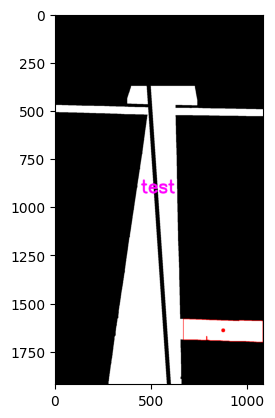

In [3]:
frames = frames[0:300]
#img = frames[230][1]
### video2
img = frames[175][1]
#plt.imshow(img)
#make line in the middle of object
#img_thresh = thresh_gauss(img)
#img_cont = find_max_contour(img_thresh)
img_cont = img_cont = seg_orientation_lines(img, "W")
# cut image in half 
#cut = 1000

cut = int(4/5 * img.shape[0])
black_up = img_cont[:cut,:]
black_down = img_cont[cut:,:]
#find center of both halfs
c_black_up, koords_up = find_center_plot(black_up)
c_black_down, koords_down = find_center_plot(black_down)
# concatenate both halfs
c_new = np.concatenate((c_black_up, c_black_down))
# make line through middle 
koords = calc_line_koords(koords_up[0], koords_up[1], koords_down[0], koords_down[1]+cut, [0,img.shape[0]])
img_line = cv2.line(c_new, koords[0], koords[1], [0,0,0], 20)
canny = cv2.Canny(img_line, 0, 0)
plt.imshow(canny)
img_cut = img_line.copy()
#TODO pixel over shape
one = canny[1910,:] > 0
### video2
#one = canny[1070,:] > 0

#xposition where img is white at bottom
on = np.where(one==True)
#dist = abs(on[0][0]-on[0][3])

#make black in line 
#TODO make good offset 
img_cut[:,on[0][0]-10:on[0][-1]+10] = 0
#in half make black
img_cut[:1000,:] = 0
#plt.imshow(img_cut)
cnts,_ = cv2.findContours(img_cut, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
new = cv2.merge((img_line, img_line, img_line))

cnts_idx = []
for i in range(0,len(cnts)):
    # Calculate the bounding rectangle of the contour
    x, y, w, h = cv2.boundingRect(cnts[i])
    if w/h > 1:
        cv2.drawContours(new, cnts, i, [255,0,0], 2)
        cnts_idx.append(i)
koords_hor = []        
for i in cnts_idx:
    _,cent = find_center_plot(cnts[i])
    cv2.circle(new,cent,10, [255,0,0], cv2.FILLED)
    koords_hor.append(cent)

new = put_text_image(new, "test")

if len(koords_hor) == 1:
    if koords_hor[0][0] < (koords[0][0]+koords[1][0])/2:
        print("left")
    if koords_hor[0][0] > (koords[0][0]+koords[1][0])/2:
        print("right")
elif len(koords_hor) == 2:
    if koords_hor[0][0] < (koords[0][0]+koords[1][0])/2 and koords_hor[1][0] > (koords[0][0]+koords[1][0])/2:
        print("left and right")

plt.imshow(new)
# rows,cols = img.shape[:2]
# [vx,vy,x,y] = cv2.fitLine(cnts[1], cv2.DIST_L2,0,0.01,0.01) 
# lefty = int((-x*vy/vx) + y)
# righty = int(((cols-x)*vy/vx)+y) 
# cv2.line(new,(cols-1,righty),(0,lefty),(0,255,0),2)
# plt.imshow(new)

1920

In [ ]:
# Define the text and its properties
text = 'Hello, World!'
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1.0
thickness = 2
color = (0, 255, 0)  # Green color in BGR format

# Get the text size
(text_width, text_height), _ = cv2.getTextSize(text, font, font_scale, thickness)

# Create a rectangle around the text
start_point = (koords[0][0], cent[0][1] - text_height)
end_point = (koords[0][0] + text_width, koords[0][1])
#cv2.rectangle(new, start_point, end_point, color, thickness)

# Add the text to the image
cv2.putText(new, text, (x, y), font, font_scale, color, thickness)



In [57]:

def rolling_average(arr, window_size):
    # Create a kernel for the rolling average
    kernel = np.ones(window_size) / window_size

    # Apply the rolling average using convolution
    rolling_avg = np.convolve(arr, kernel, mode='valid')

    return rolling_avg


In [63]:
arr = np.array([1, 2, 3, 4, 5])

# Define the condition
condition = arr > 2

# Hold the value after the condition using numpy.where
arr = np.where(condition, arr[condition][-1], arr)
arr

array([1, 2, 5, 5, 5])

: 